## Extracts the parameters of the YOLO model from the the auxiliary trainer model

In [1]:
import math
import tensorflow as tf

### YOLO model

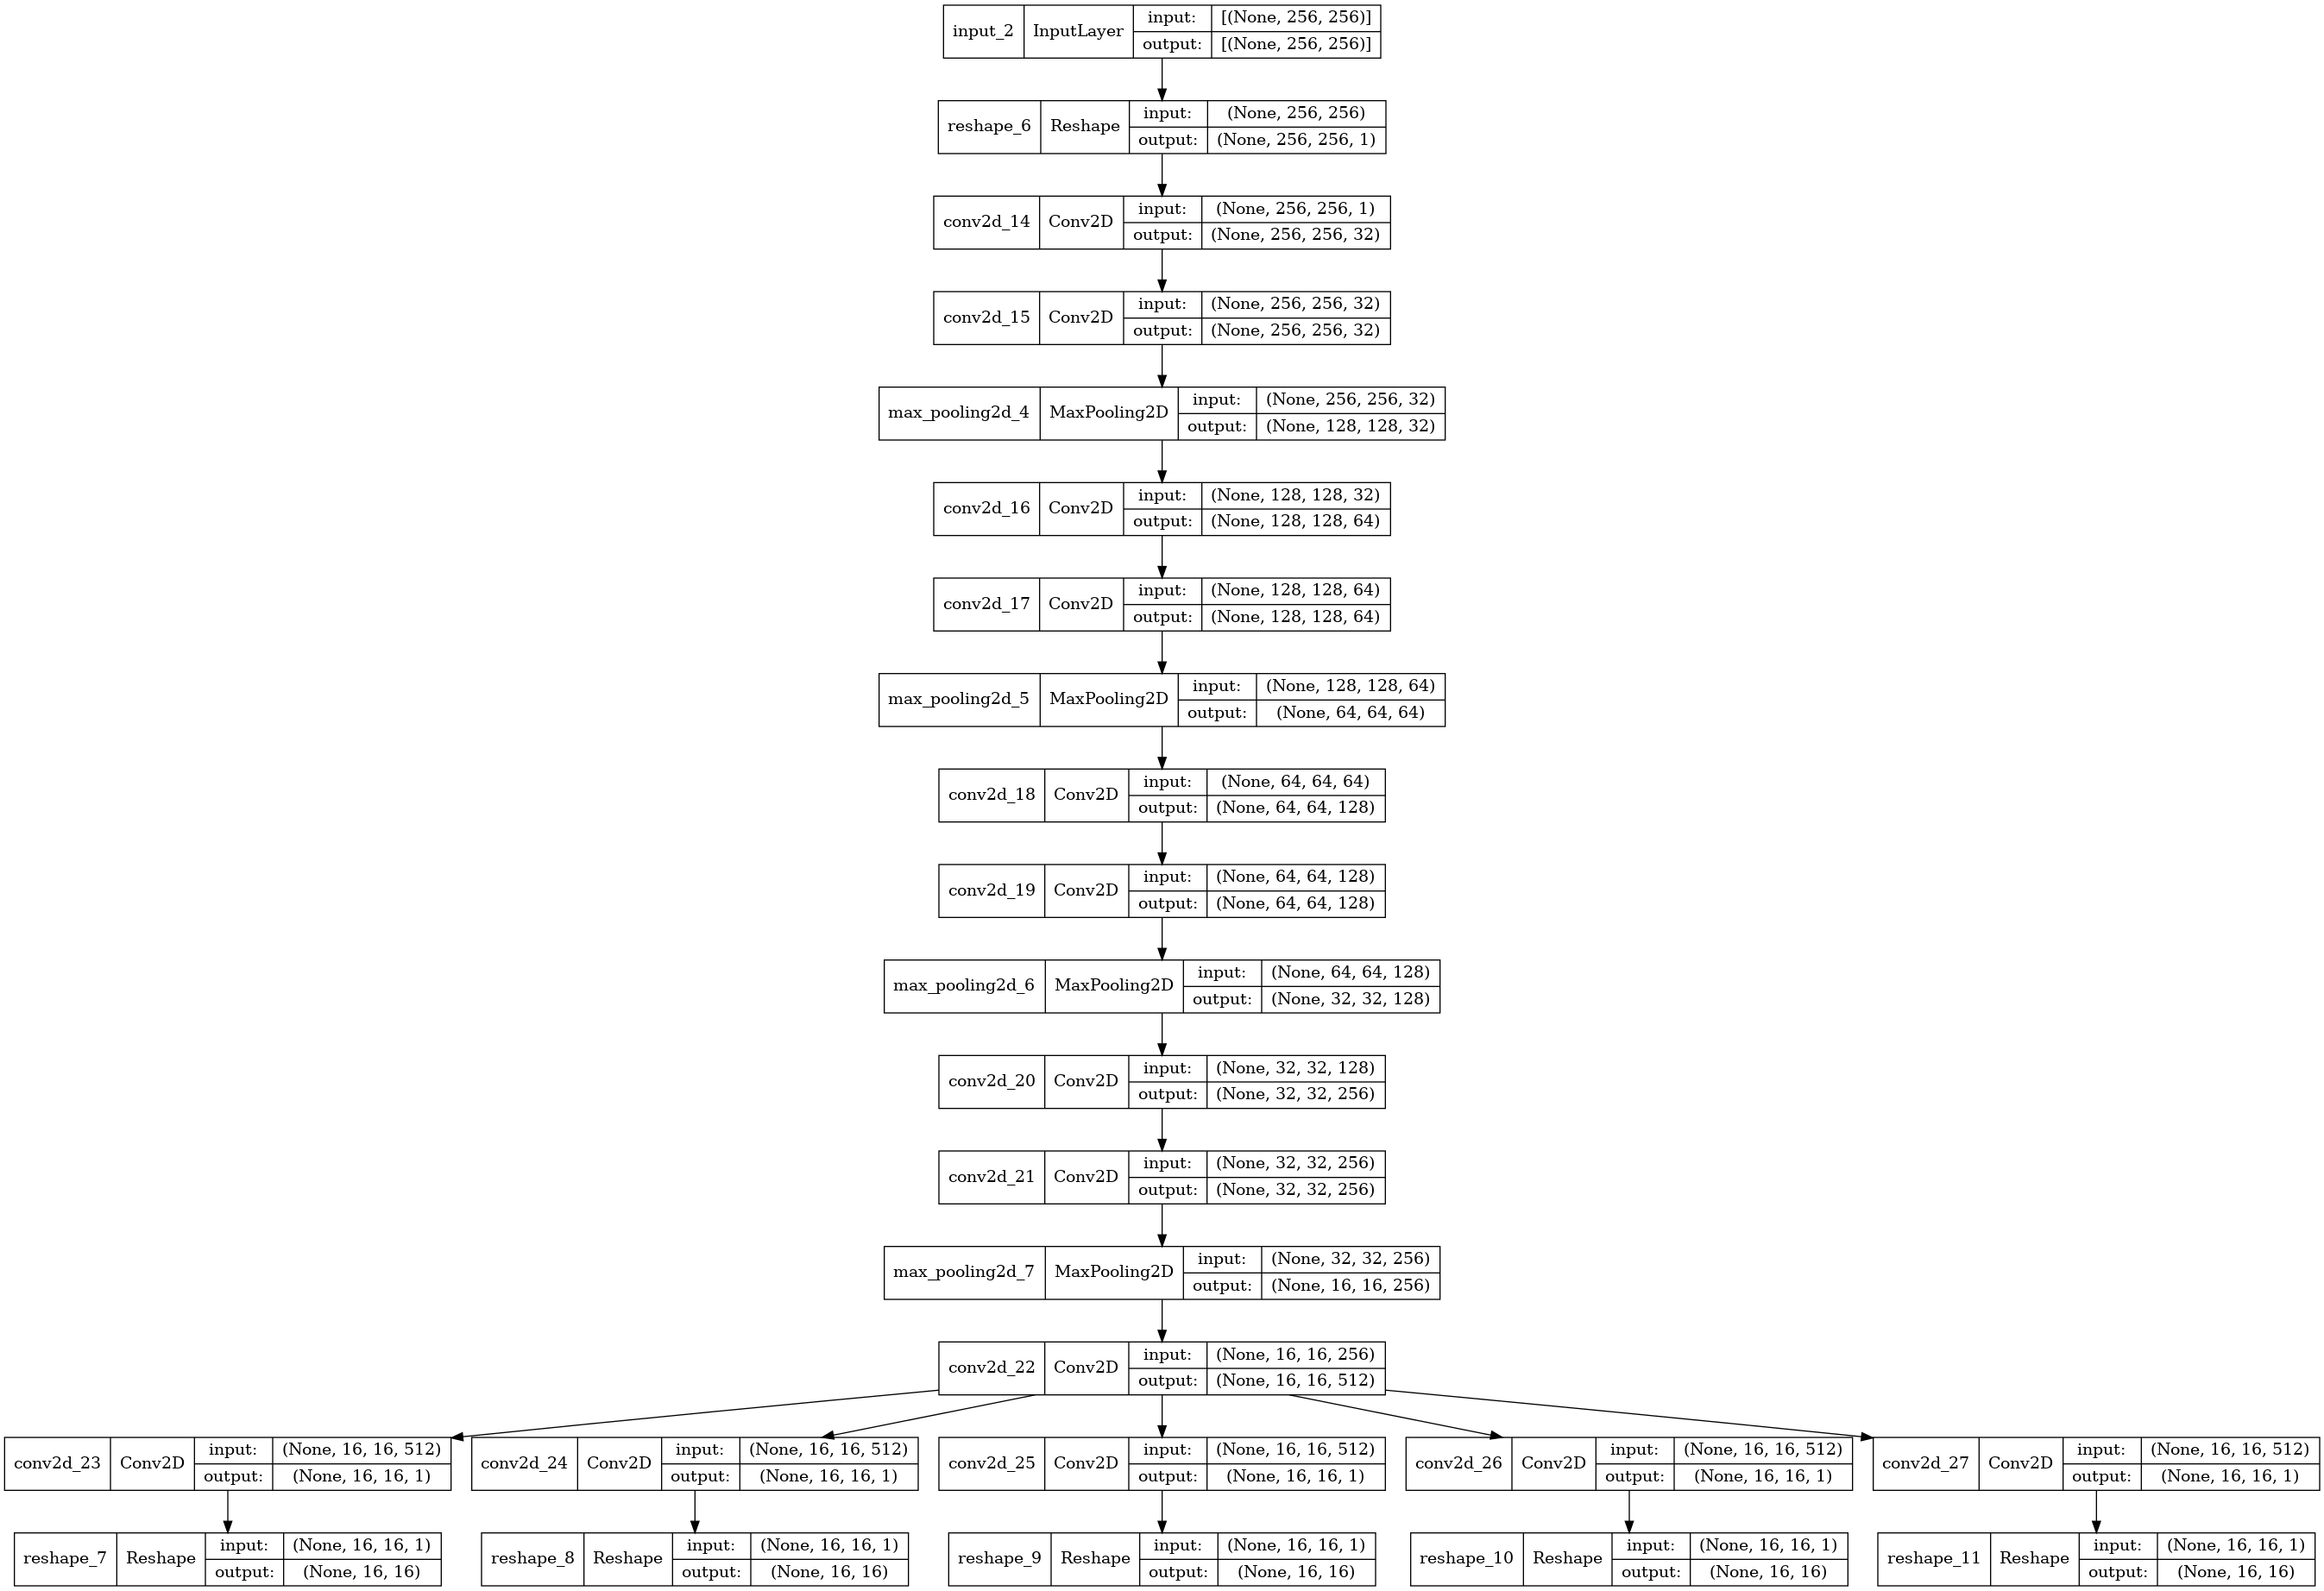

In [3]:
spectrum = tf.keras.Input([256, 256])
signal = tf.keras.layers.Reshape([256, 256, 1])(spectrum)
signal = tf.keras.layers.Conv2D(32, 3, 1, 'same', activation = 'relu')(signal)
signal = tf.keras.layers.Conv2D(32, 3, 1, 'same', activation = 'relu')(signal)
signal = tf.keras.layers.MaxPool2D()(signal) #(128, 128, 32)
signal = tf.keras.layers.Conv2D(64, 3, 1, 'same', activation = 'relu')(signal)
signal = tf.keras.layers.Conv2D(64, 3, 1, 'same', activation = 'relu')(signal)
signal = tf.keras.layers.MaxPool2D()(signal) #(64, 64, 64)
signal = tf.keras.layers.Conv2D(128, 3, 1, 'same', activation = 'relu')(signal)
signal = tf.keras.layers.Conv2D(128, 3, 1, 'same', activation = 'relu')(signal)
signal = tf.keras.layers.MaxPool2D()(signal) #(32, 32, 128)
signal = tf.keras.layers.Conv2D(256, 3, 1, 'same', activation = 'relu')(signal)
signal = tf.keras.layers.Conv2D(256, 3, 1, 'same', activation = 'relu')(signal)
signal = tf.keras.layers.MaxPool2D()(signal) #(16, 16, 256)
signal = tf.keras.layers.Conv2D(512, 3, 1, 'same', activation = 'relu')(signal)
ob_logits = tf.keras.layers.Conv2D(1, 3, 1, 'same')(signal)
ob_logits = tf.keras.layers.Reshape([16, 16])(ob_logits)
sp_shifts = tf.keras.layers.Conv2D(1, 3, 1, 'same')(signal)
sp_shifts = tf.keras.layers.Reshape([16, 16])(sp_shifts)
fr_shifts = tf.keras.layers.Conv2D(1, 3, 1, 'same')(signal)
fr_shifts = tf.keras.layers.Reshape([16, 16])(fr_shifts)
dc_shifts = tf.keras.layers.Conv2D(1, 3, 1, 'same')(signal)
dc_shifts = tf.keras.layers.Reshape([16, 16])(dc_shifts)
am_shifts = tf.keras.layers.Conv2D(1, 3, 1, 'same')(signal)
am_shifts = tf.keras.layers.Reshape([16, 16])(am_shifts)
model = tf.keras.models.Model(spectrum, (ob_logits, sp_shifts, fr_shifts, dc_shifts, am_shifts))
tf.keras.utils.plot_model(model, to_file='YOLOmodel.png', show_shapes=True)

Auxiliary trainer model.

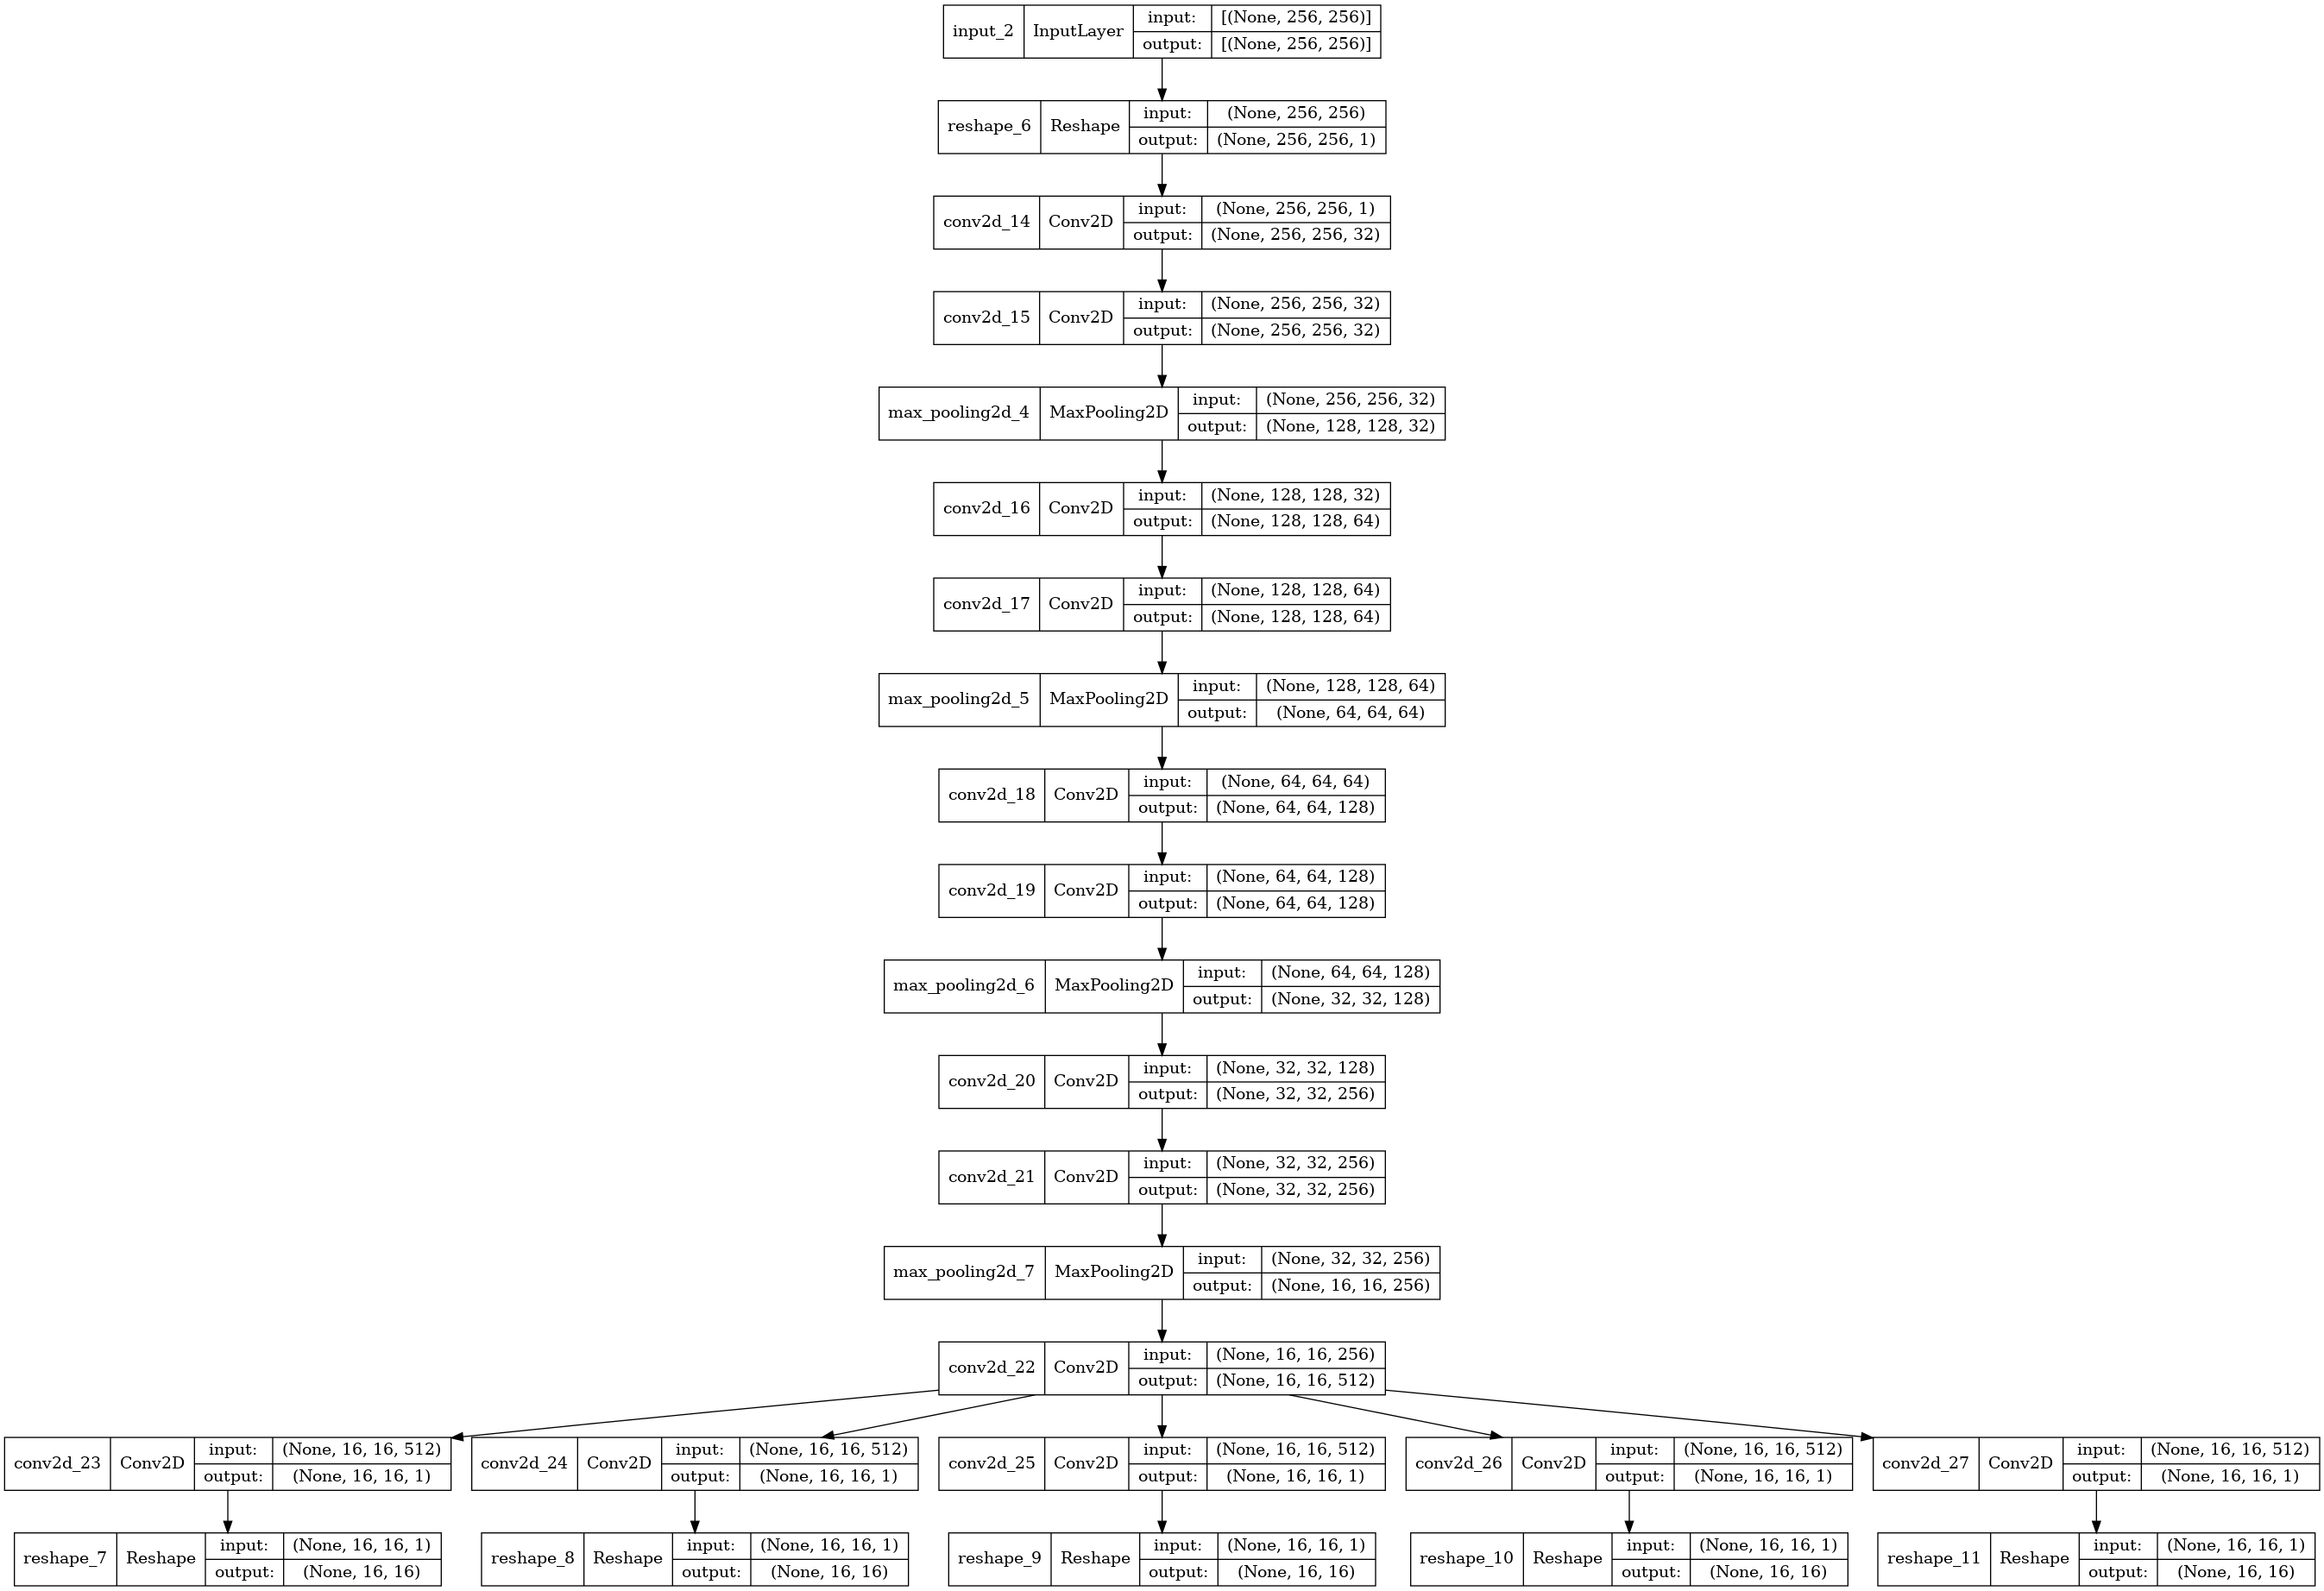

In [4]:
spectrum = tf.keras.Input([256, 256])
ob_labels = tf.keras.Input([16, 16])
ob_logits, sp_shifts, fr_shifts, dc_shifts, am_shifts = model(spectrum)
ob_logits = tf.keras.layers.Lambda(lambda logits: logits, name = 'ob')(ob_logits)
sp_shifts = sp_shifts * ob_labels
sp_shifts = tf.keras.layers.Lambda(lambda shifts: shifts, name = 'sp')(sp_shifts)
fr_shifts = fr_shifts * ob_labels
fr_shifts = tf.keras.layers.Lambda(lambda shifts: shifts, name = 'fr')(fr_shifts)
dc_shifts = dc_shifts * ob_labels
dc_shifts = tf.keras.layers.Lambda(lambda shifts: shifts, name = 'dc')(dc_shifts)
am_shifts = am_shifts * ob_labels
am_shifts = tf.keras.layers.Lambda(lambda shifts: shifts, name = 'am')(am_shifts)
trainer = tf.keras.models.Model((spectrum, ob_labels), (ob_logits, sp_shifts, fr_shifts, dc_shifts, am_shifts))
tf.keras.utils.plot_model(model, to_file='YOLOtrainer.png', show_shapes=True)

Read weights of the trainer model.

In [5]:
trainer.load_weights('model/04train.h5')

Write weights of the YOLO model.

In [6]:
model.save_weights('05extract.h5')